In [1]:
rm(list=ls())
library(foreign)
library(TSA)
library(zoo)
library(eventstudies)
library(tseries)
# library(strucchange) not available under certain versions
library(urca)
library(changepoint)
library(forecast)
library(MASS)

Loading required package: leaps
Loading required package: locfit
locfit 1.5-9.1 	 2013-03-22
Loading required package: mgcv
Loading required package: nlme
This is mgcv 1.8-17. For overview type 'help("mgcv-package")'.
Loading required package: tseries

Attaching package: ‘TSA’

The following objects are masked from ‘package:stats’:

    acf, arima

The following object is masked from ‘package:utils’:

    tar


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: xts
Loading required package: boot
Successfully loaded changepoint package version 2.2.2
 NOTE: Predefined penalty values changed in version 2.2.  Previous penalty values with a postfix 1 i.e. SIC1 are now without i.e. SIC and previous penalties without a postfix i.e. SIC are now with a postfix 0 i.e. SIC0. See NEWS and help files for further details.

Attaching package: ‘forecast’

The following objects are masked from ‘package:TSA’:

    fitt

read the data (only **Germany**)

In [2]:
ger <- read.dta("/...your folder/DAYPOLLS_GER.dta")

create the date (based on stata)

In [3]:
ger$date <- seq(as.Date("1957-09-16"),as.Date("2013-09-22"), by="day")

subset the data

In [4]:
geroa <- ger[ger$date >= "2000-01-01",]

reducing the data

In [5]:
geroar <- cbind(geroa$poll_p1_ipo, geroa$poll_p4_ipo)

create the daily times series data

In [6]:
geroar <- zoo(geroar, geroa$date)

name the column (don't need for date)

In [7]:
colnames(geroar) <- c("CDU/CSU", "FDP")

searching for the index of the date when scandal happend

In [8]:
which(time(geroar)=="2010-12-02")

[1] 3989

In [9]:
which(time(geroar)=="2011-02-16")

[1] 4065

create values for vline, one for each panel

In [10]:
v.panel <- function(x, ...){
	lines(x, ...)
	panel.number <- parent.frame()$panel.number
	abline(v = vlines[panel.number], col = "red", lty=2)
}

plot **CDU/CSU** after 2000

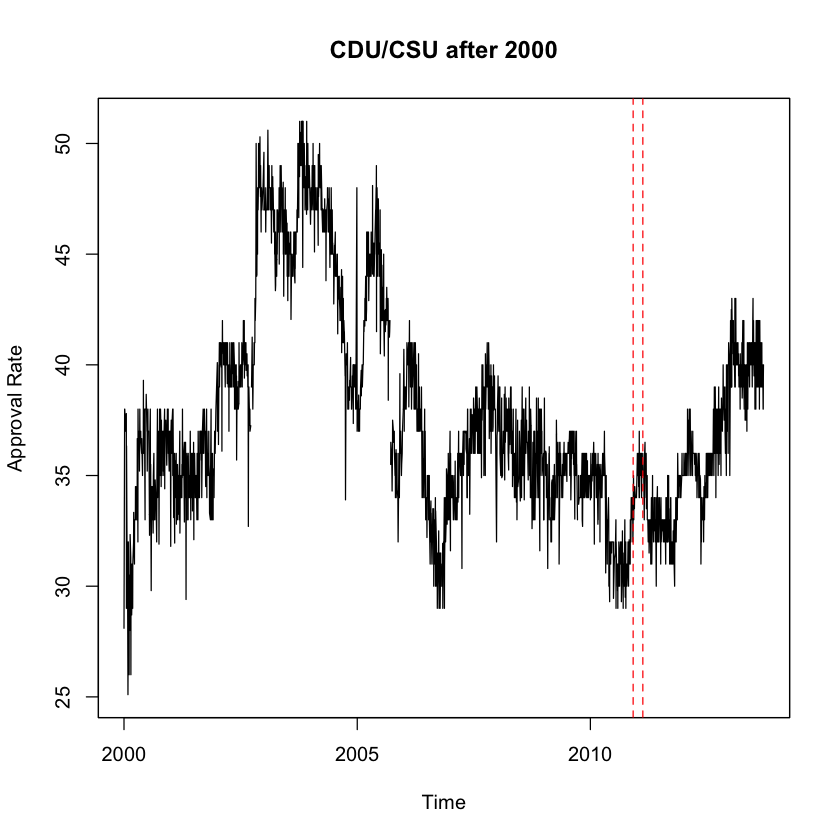

In [11]:
plot(geroar$CDU, main="CDU/CSU after 2000", xlab="Time", ylab="Approval Rate")
abline(v=time(geroar$CDU)[3989], lty=2, col="red")
abline(v=time(geroar$CDU)[4065], lty=2, col="red")

plot **FDP** after 2000

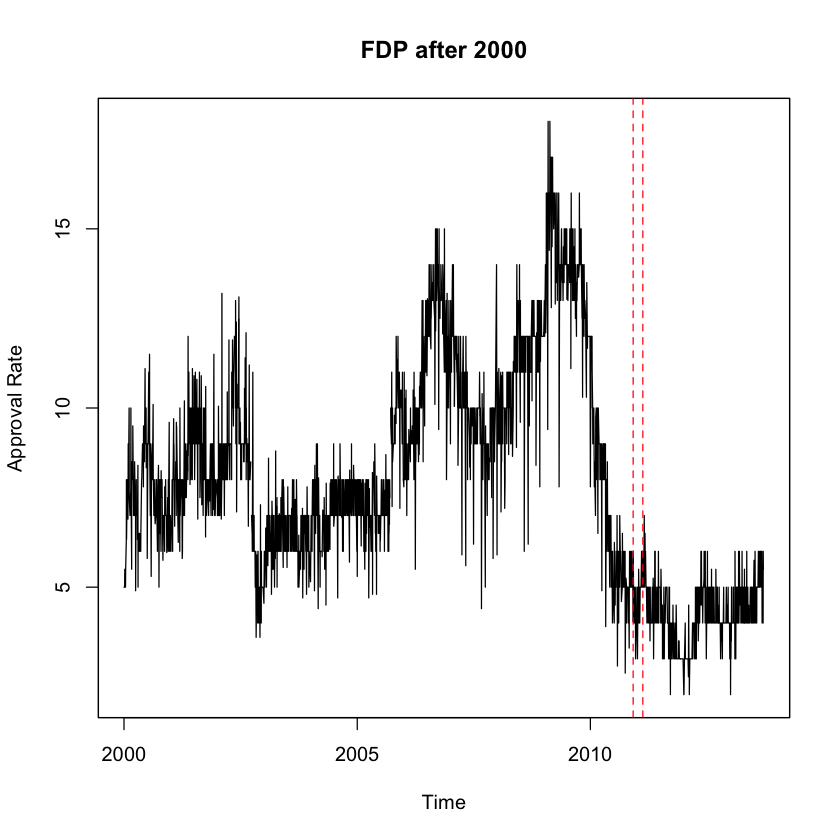

In [12]:
plot(geroar$FDP, main="FDP after 2000", xlab="Time", ylab="Approval Rate")
abline(v=time(geroar$CDU)[3989], lty=2, col="red")
abline(v=time(geroar$CDU)[4065], lty=2, col="red")

Go to **German(CDU)2M1**, **German(FDP)2M1**, **German(CDU)2M2**, and **German(FDP)2M2**